In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
pip install ucimlrepo

In [28]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

features_dict = {}
cnt = 0
for i in heart_disease.variables['name']:
  features_dict[cnt] = i
  cnt+=1
print(features_dict)

# metadata
# print(heart_disease.metadata)
# print()
# # variable information
# print(heart_disease.variables)

{0: 'age', 1: 'sex', 2: 'cp', 3: 'trestbps', 4: 'chol', 5: 'fbs', 6: 'restecg', 7: 'thalach', 8: 'exang', 9: 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'}
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0  

#PART A

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ML/A2/heart+disease/processed.cleveland.data', header = None)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
df.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [10]:
#Converting to binary classification
df.loc[df[13]>0,13] = 1
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [11]:
#Replacing missing values ('?') with mode.
for columns in df:
  df[columns] = df[columns].replace('?', df[columns].mode().values[0])


In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [13]:
categorical_ls = [1,2,5,6,8,10,12]
numerical_ls = [0,3,4,7,9,11]
target = 13
features_dict

{0: 'age',
 1: 'sex',
 2: 'cp',
 3: 'trestbps',
 4: 'chol',
 5: 'fbs',
 6: 'restecg',
 7: 'thalach',
 8: 'exang',
 9: 'oldpeak',
 10: 'slope',
 11: 'ca',
 12: 'thal',
 13: 'num'}

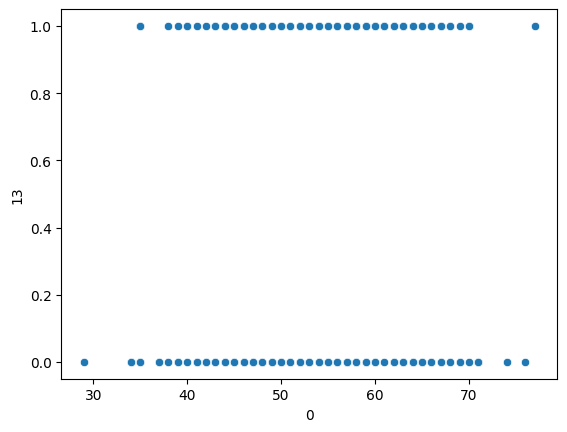

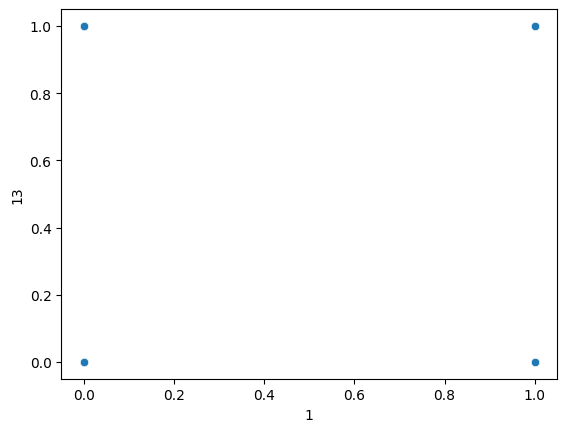

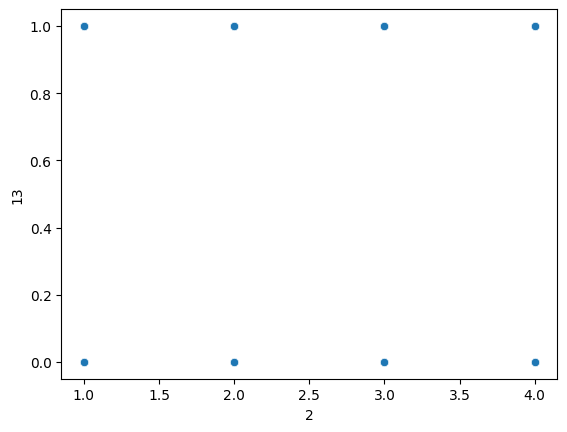

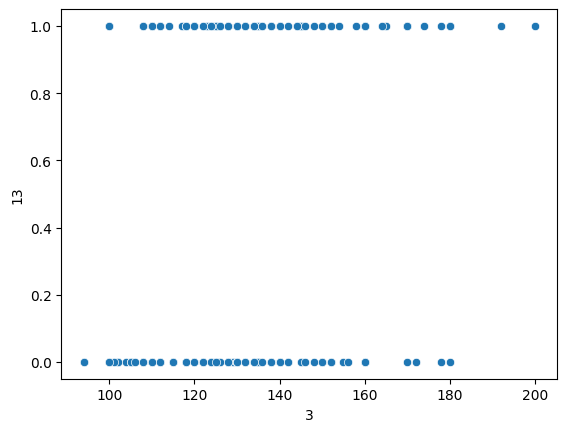

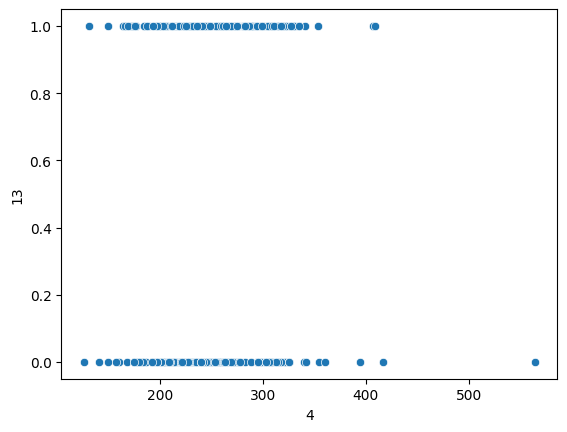

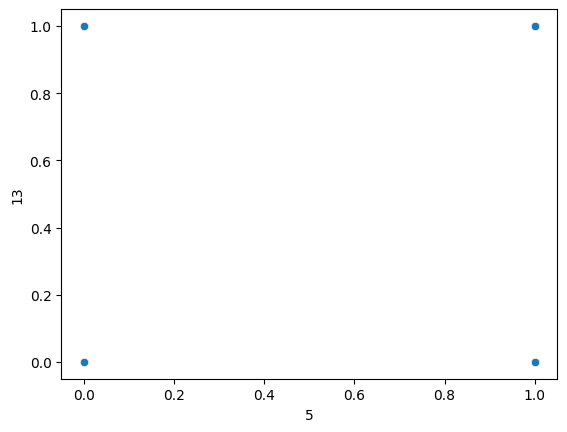

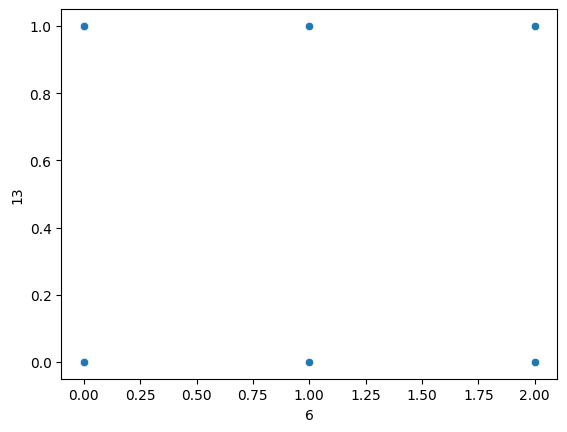

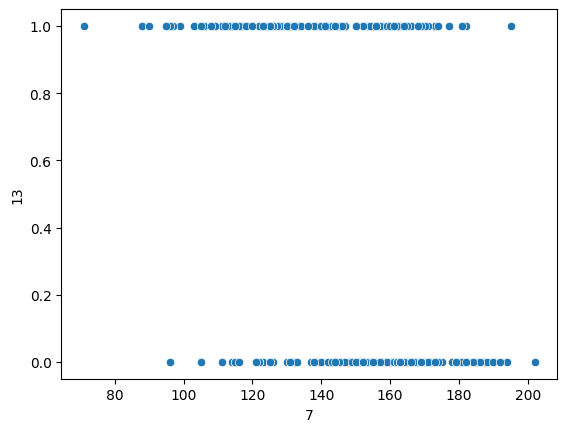

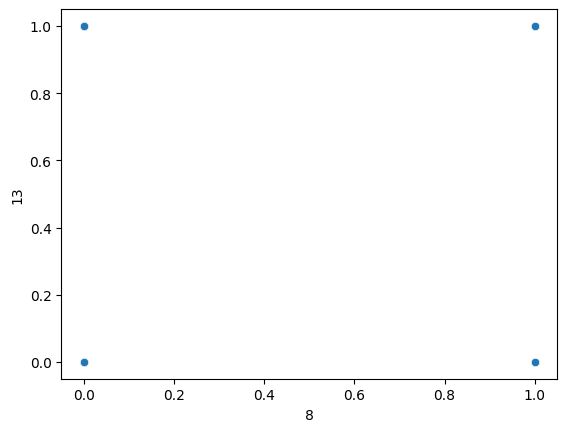

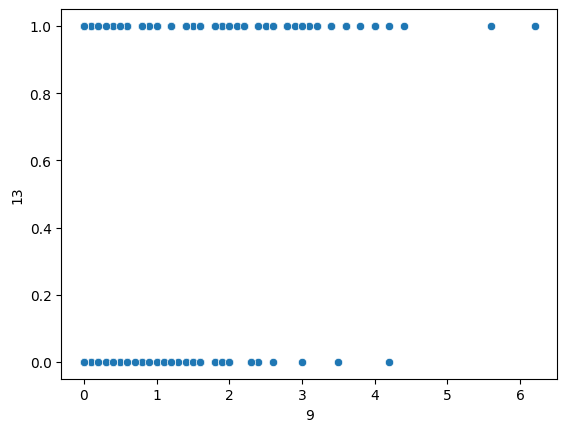

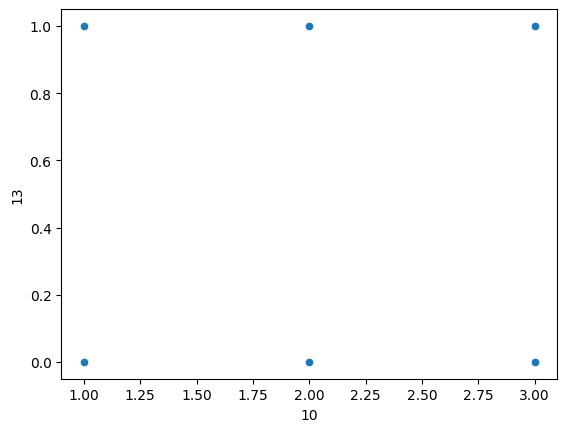

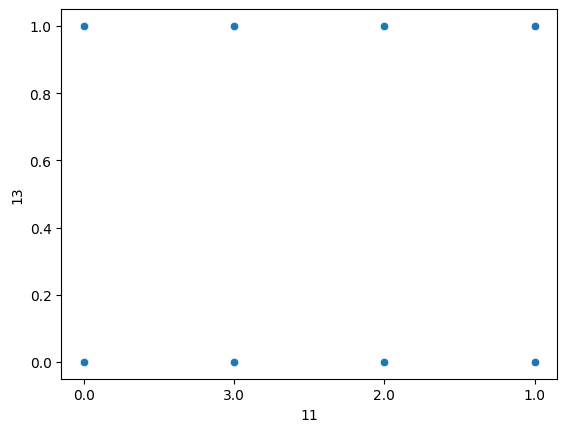

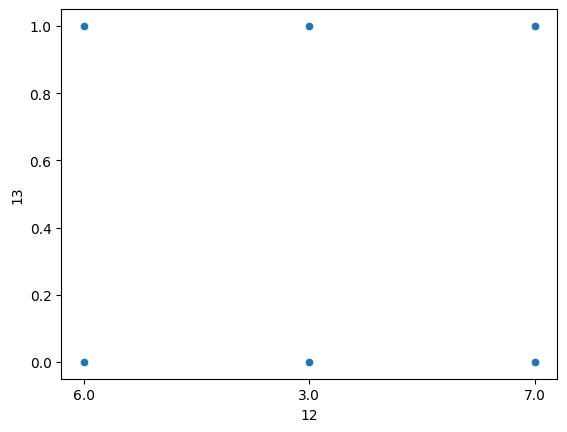

In [14]:
# SCATTER PLOTS
for i in df:
  if(i != target):
    sns.scatterplot(data=df,x=i,y=target)
    plt.show()

<ipython-input-15-717e936e302c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


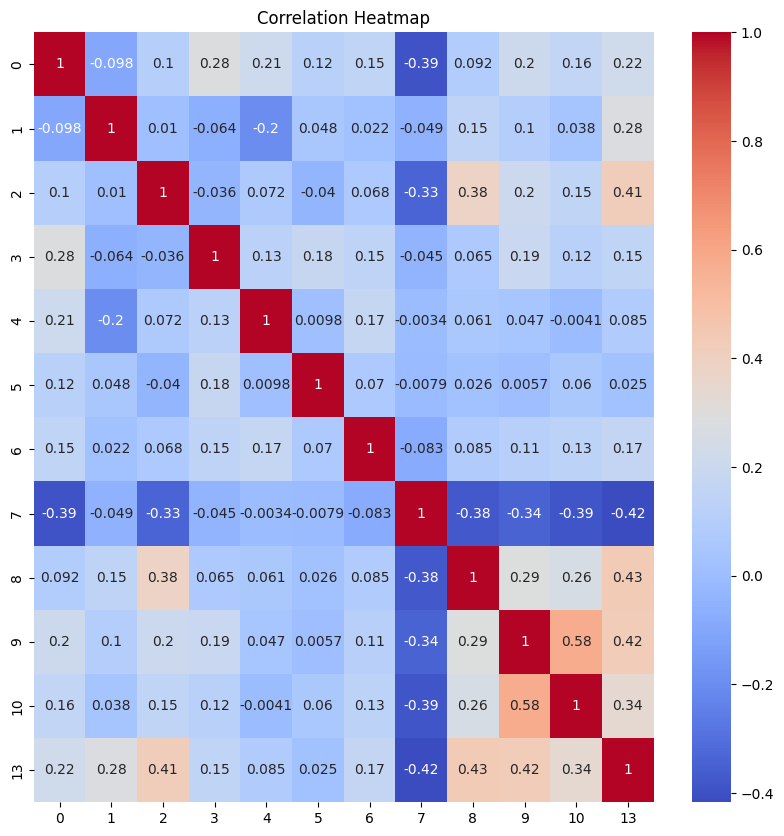

In [15]:
# HEAT MAP FPR NON CATEGORICAL DATA
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

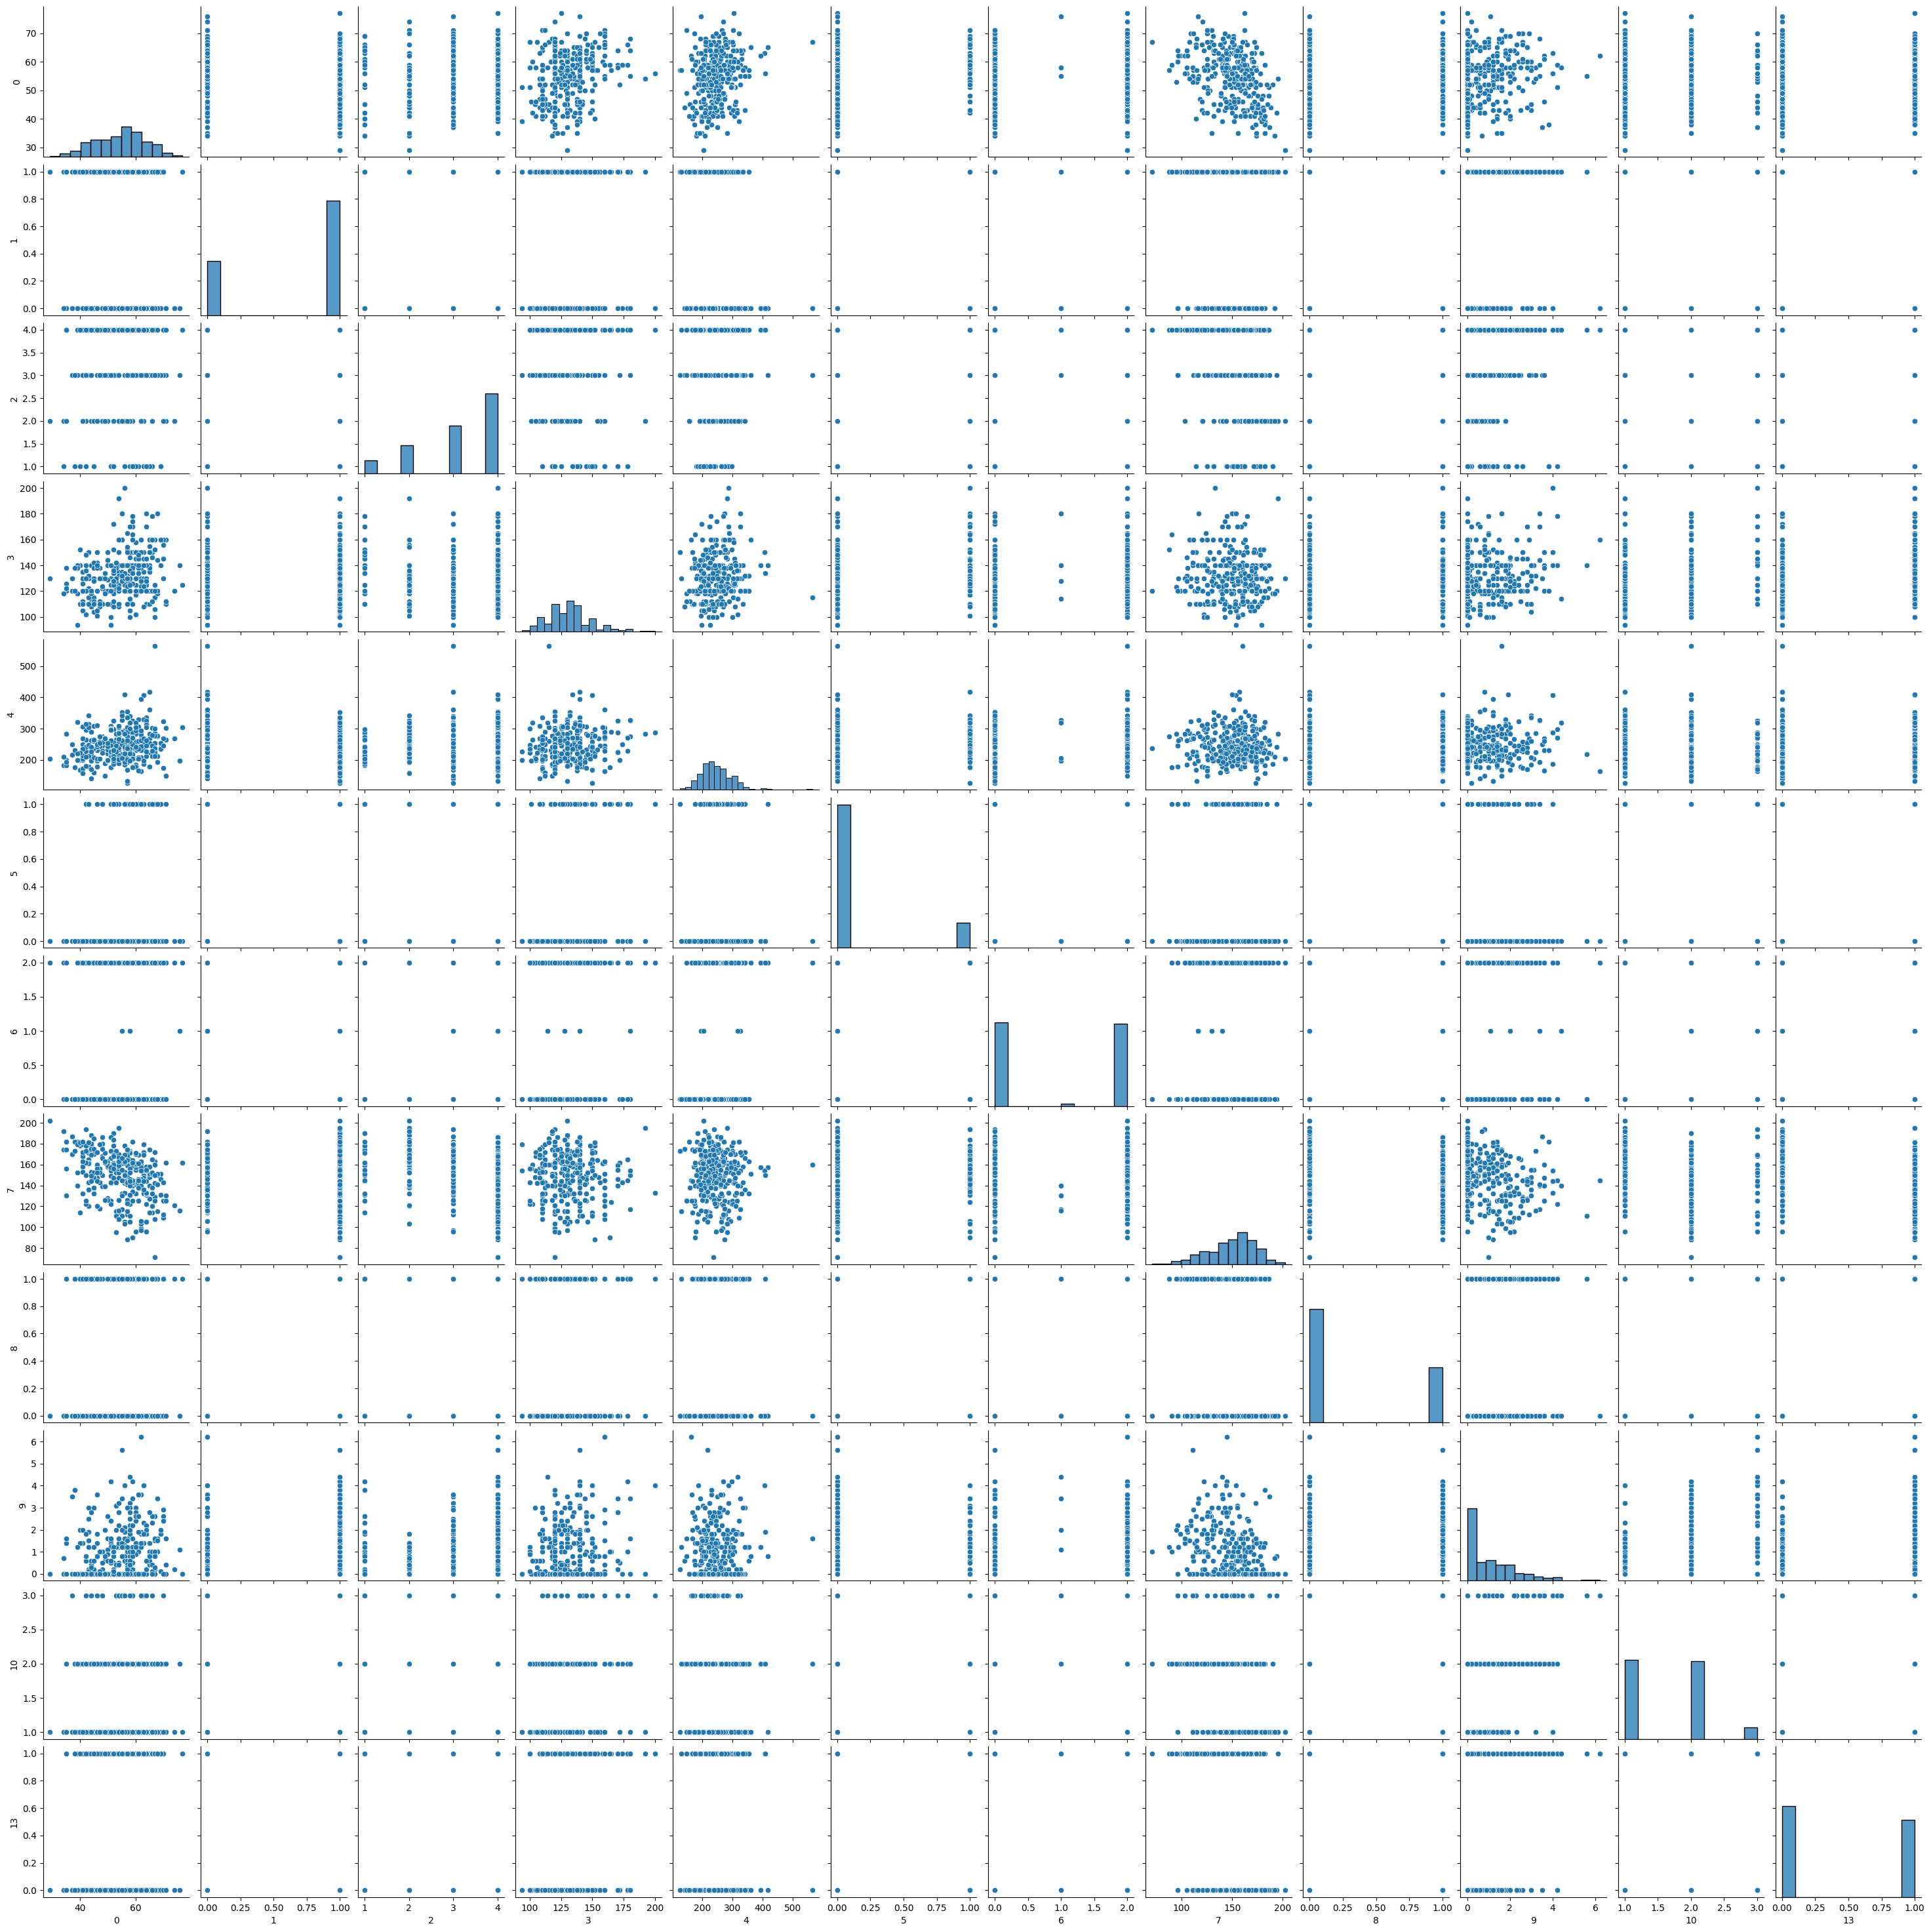

In [16]:
sns.pairplot(df)

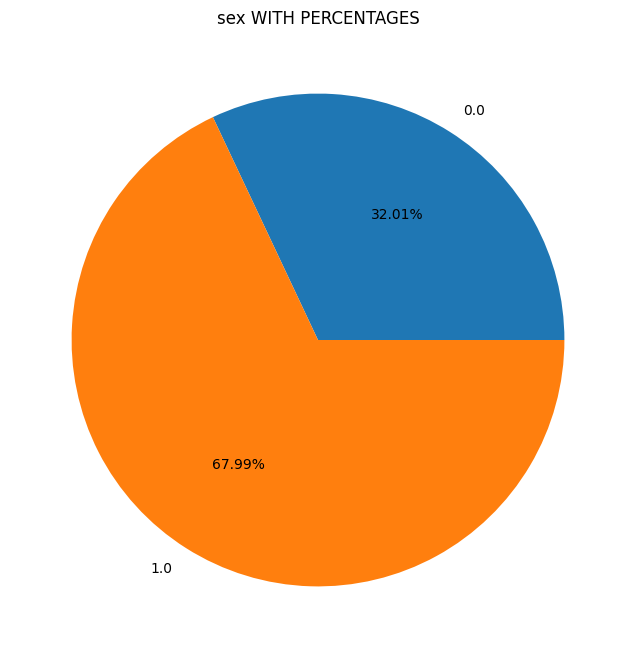

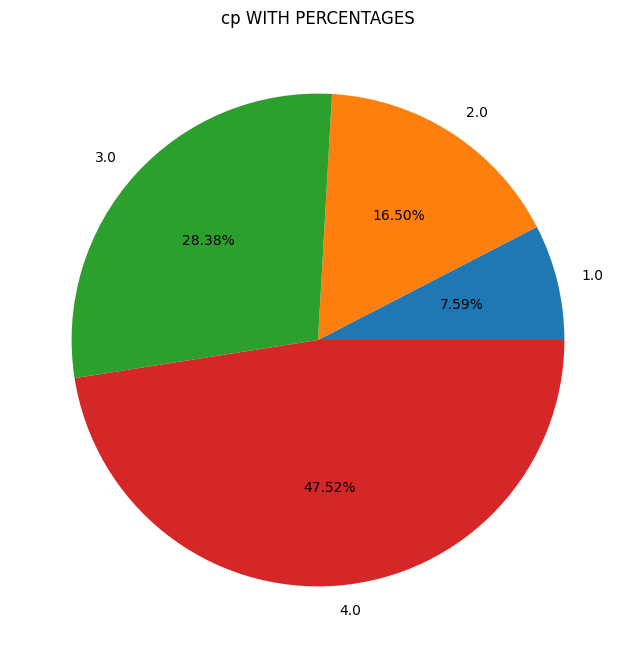

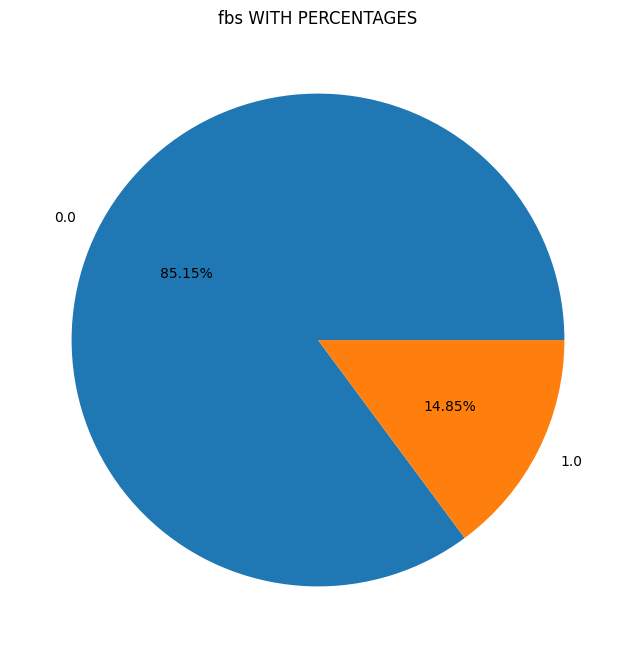

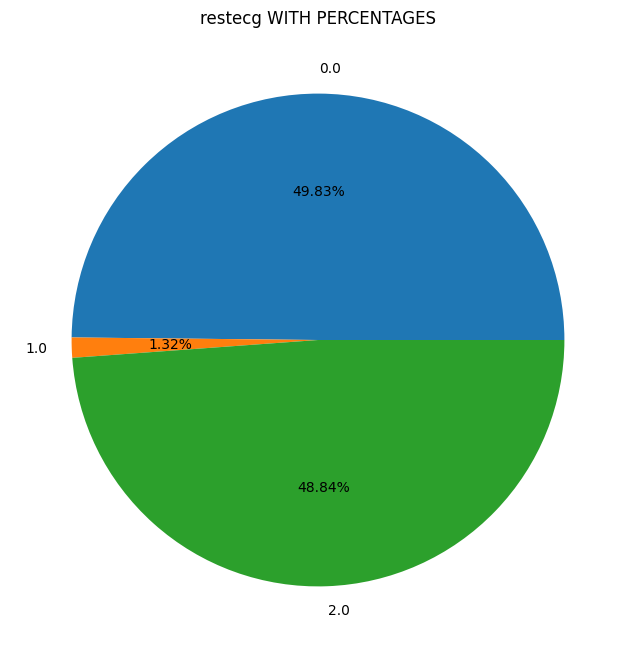

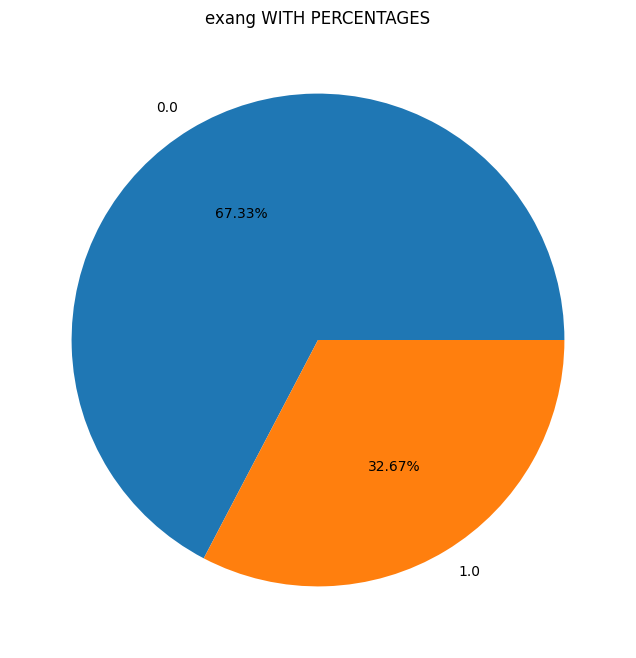

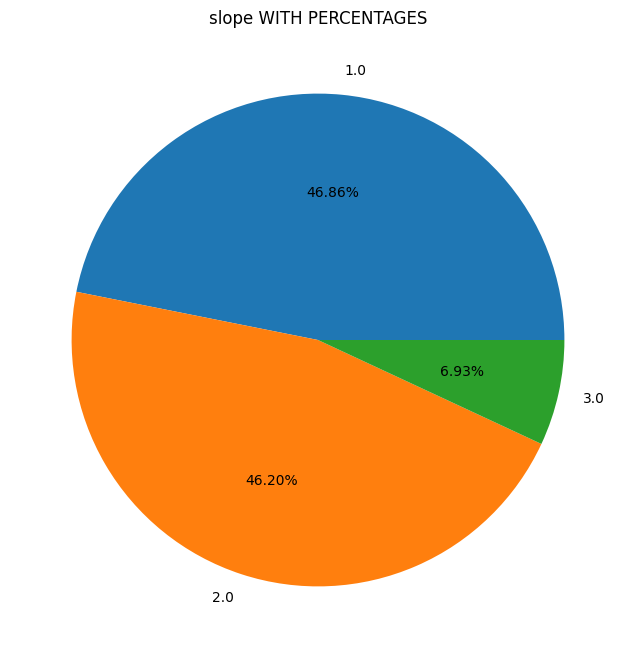

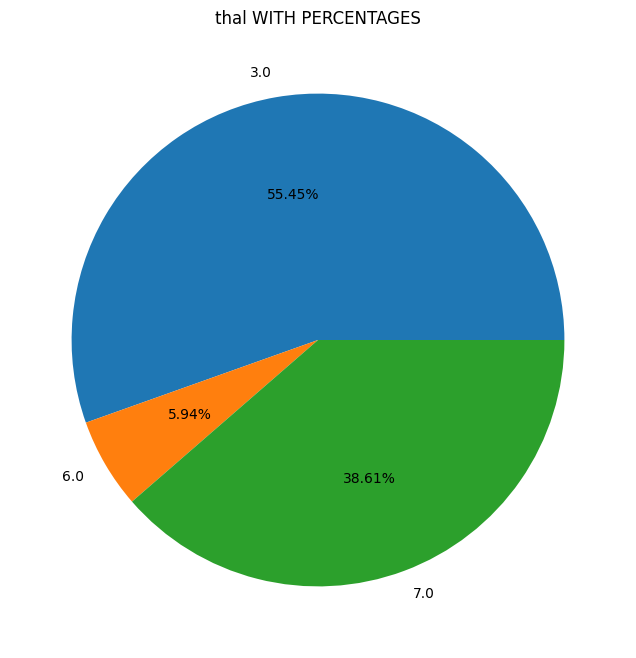

In [17]:
#Pie Chart for Categorical Data
for i in categorical_ls:
  plt.figure(figsize=(15,8))
  plt.title(features_dict[i] + " WITH PERCENTAGES")
  df.groupby(i).size().plot(kind='pie', autopct='%1.2f%%')
  plt.show()

#PART B

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [34]:
X = df.drop(target,axis = 1)
Y = df[target]
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

#Part C

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
#Entropy
Entropy = DecisionTreeClassifier(criterion='entropy')
Entropy.fit(x_train, y_train)
ypredEntropy = Entropy.predict(x_test)
accuracyEntropy = accuracy_score(y_test, ypredEntropy)
print(accuracyEntropy)

0.7049180327868853


In [37]:
#Gini
Gini = DecisionTreeClassifier(criterion='gini')
Gini.fit(x_train, y_train)
ypredGini = Gini.predict(x_test)
accuracyGini = accuracy_score(y_test, ypredGini)
print(accuracyGini)

0.6557377049180327


#PART D

In [24]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid = {
    'min_samples_split': [2, 3, 5, 7, 9, 10],
    'max_features': ['sqrt', 'log2', None]
}
tree = DecisionTreeClassifier(criterion='entropy')

gridSearch = GridSearchCV(estimator=tree, param_grid = grid, cv=5, scoring='accuracy')
gridSearch.fit(x_train, y_train)
best_min_samples_split = gridSearch.best_params_['min_samples_split']
best_max_features = gridSearch.best_params_['max_features']

finalTree = DecisionTreeClassifier(criterion='entropy', min_samples_split = best_min_samples_split, max_features = best_max_features)
finalTree.fit(x_train, y_train)
ypredFinal = finalTree.predict(x_test)
accuracyFinal = accuracy_score(y_test, ypredFinal)
print("Hyperparameters Values:")
print("min_samples_split:" + str(best_min_samples_split))
print("max_features:" + str(best_max_features))
print("Accuracy:" + str(accuracyFinal))

Hyperparameters Values:
min_samples_split:9
max_features:log2
Accuracy:0.7213114754098361


#Part E

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [40]:
grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 7, 9, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

finalrf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split)
finalrf.fit(x_train, y_train)
y_pred = finalrf.predict(x_test)
acc = accuracy_score(y_test, ypredFinal)
classification_rep = classification_report(y_test, y_pred)

print("Hyperparameters Values:")
print("n_estimators:" + str(best_n_estimators))
print("max_depth:"  + str(best_max_depth))
print("min_samples_split:" + str(best_min_samples_split))
print("Classification Report:")
print(classification_rep)
print()
print("Accuracy:" + str(acc))

Hyperparameters Values:
n_estimators:50
max_depth:20
min_samples_split:9
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81        32
           1       0.86      0.62      0.72        29

    accuracy                           0.77        61
   macro avg       0.79      0.76      0.76        61
weighted avg       0.79      0.77      0.76        61


Accuracy:0.7213114754098361
